# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# number of training examples
n_train = len(X_train)

# number of testing examples
n_test = len(X_test)

# what's the shape of an image?
#image_shape = train['sizes'][2]
image_shape = X_train[0].shape

# how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [4]:
### y_train to one-hot Y_train
### REF: http://stackoverflow.com/questions/29831489/numpy-1-hot-array

import numpy as np

def convertToOneHot(labels, n_classes=n_classes):
    ### n_classes = max(labels) + 1
    size_labels = len(labels)
    onehot = np.zeros(shape=(size_labels, n_classes),dtype=np.float32)
    onehot[np.arange(size_labels), labels] = 1.
    return onehot

"""Unit Test"""
#print(convertToOneHot([0, 1, 2]))
#print(convertToOneHot([2, 1, 0, 9, 5, 6, 7, 1, 3, 5]))

'Unit Test'

In [5]:
### Y_train

Y_train = convertToOneHot(y_train)
Y_test  = convertToOneHot(y_test)
print (y_train)
print (y_test)
print (Y_train.shape)
print (Y_train[948])
#print (Y_train)
print (Y_train.dtype)
print (Y_test[10])


[ 0  0  0 ..., 42 42 42]
[16  1 38 ...,  6  7 10]
(39209, 43)
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
float32
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [6]:
%matplotlib inline
### Train data
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

#plt.imshow(X_train[0], interpolation='nearest')
#plt.show()
#print (X_train[0].shape)

#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
#ax1.imshow(X_train[0].reshape(32, 32, 3));
#ax2.imshow(X_train[101].reshape(32, 32, 3));
#ax3.imshow(X_train[201].reshape(32, 32, 3));
#ax4.imshow(X_train[1011].reshape(32, 32, 3));
#ax5.imshow(X_train[3001].reshape(32, 32, 3));

### REF: https://carnd-udacity.atlassian.net/wiki/questions/10322627/project-2-unbalanced-data-generating-additional-data-by-jittering-the-original-image
def show_images(images=X_train, size=30, skips=103):
    n_images = len(images)
    gs1 = gridspec.GridSpec(3, 10)
    gs1.update(wspace=0.1, hspace=0.1)
    plt.figure(figsize=(12, 3))
    for i in range(size):
        ax1 = plt.subplot(gs1[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        image = images[(i*skips) % n_images]
        # plt.subplot(3, 10,i+1)
        if image.shape[2] == 1: # grey
            image = image[:, :, 0]
            # print (image.shape)
        plt.imshow(image, cmap=plt.cm.Greys) # for grey images in grey
        plt.axis('off')
    plt.show()

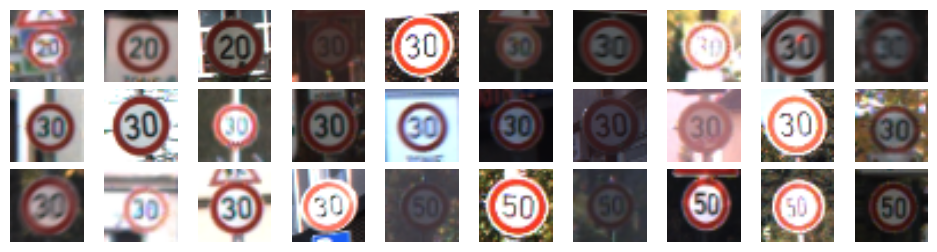

In [7]:
show_images()

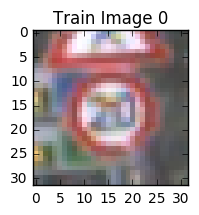

In [8]:
### Data exploration visualization using ipywidgets
### The wigets will make exploration interactive like a GUI
###
### REF: https://github.com/ipython/ipywidgets
###

"""
Addtional requirements

```
conda install -c conda-forge ipywidgets
```

To enable this cell:
1. please intall the addtional requirements
2. and change the cell type from "Markdown" to "Code"

To disable this cell:
1. Chage the cell type to "Markdown" 
"""

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, Image
from IPython.display import display
import ipywidgets as widgets

"""
REF: http://stackoverflow.com/questions/33742331/how-to-set-matplotlib-to-show-every-image-of-an-array
"""
def browse_image_interactive(images, title = 'Image'):
    n_imgs = len(images)
    def view_image (image = 0):
        plt.figure(figsize=(2, 2))
        plt.imshow(images[image], interpolation='nearest', cmap=plt.get_cmap('gray'))
        plt.title('{0} {1}'.format(title, image))
        plt.show()
    interact(view_image, image=(0, n_imgs-1))
    
browse_image_interactive(X_train, title='Train Image')
#browse_image_interactive(X_test, title='Test Image')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.


In [10]:
## REF: https://github.com/udacity/CarND-TensorFlow-Lab

#from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
#from tqdm import tqdm

## REF: http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
## Color to Gray
def color_to_grey_image(
    image, 
    use_channel=True,
    norm_type = 0):
    """
    Input:
      image shape: (n, n, 3)
      norm_type = 0: [-0.5, 0.5]
    Return:
    If use_channel:
      return shape(n, n, 1)
    else 
      return shape(n, n)
    """
    g_image = np.mean(image, axis = -1)
    if norm_type == 0:
        g_image = (g_image - (255 / 2.0)) / 255
    
    if use_channel:
        ret_image = np.zeros(
            (image.shape[0], image.shape[1], 1),
            dtype = np.float32)
        ret_image[:,:,0] = g_image
    else:
        ret_image = g_image
    return ret_image
    
def color_to_grey_images(
    images,
    use_channel=True,
    norm_type = 0):
    inum = len(images)
    ishape = images[0].shape
    g_images = np.zeros((inum, ishape[0], ishape[1], 1),
                        dtype = np.float32)
    for n in range(inum):
        g_images[n] = color_to_grey_image(
            images[n], use_channel=use_channel, norm_type=norm_type)
    return g_images

In [11]:
###
### REF: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/tools/docker/notebooks/3_mnist_from_scratch.ipynb
###

def show_grey_image_hist(image, xrange=[-0.5, 0.5], use_channel=True):
    s_image = image
    if use_channel:
        ishape = image.shape
        s_image = np.zeros((ishape[0], ishape[1]))
        s_image = image[:, :, 0]
    _, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(s_image, cmap=plt.cm.Greys);
    ax2.hist(s_image, bins=10, range=xrange);
    plt.show()


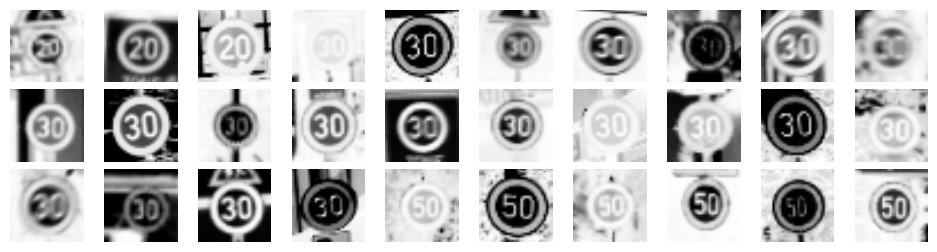

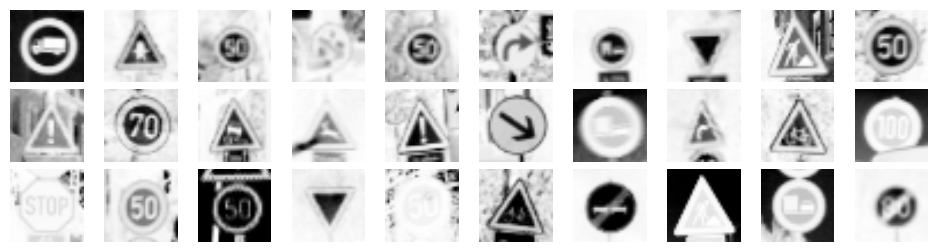

In [12]:
## Convert color to grey
X_train_grey = color_to_grey_images(X_train)
X_test_grey = color_to_grey_images(X_test)

show_images(images=X_train_grey)
show_images(images=X_test_grey)


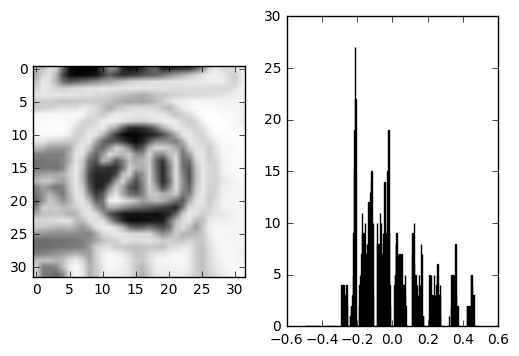

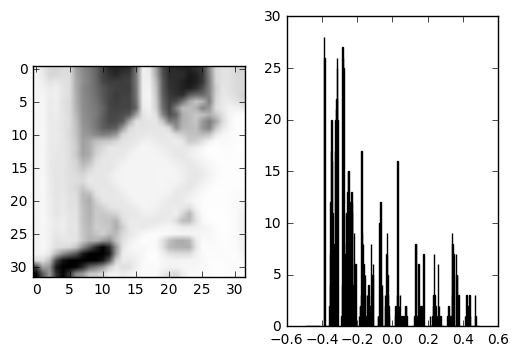

In [13]:
## Show grey image and histogram
show_grey_image_hist(X_train_grey[10], xrange=[-0.5, 0.5])
show_grey_image_hist(X_test_grey[10], xrange=[-0.5, 0.5])


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

Design the model using greyscale images for training to start with:
1. Make image from color to grey scale
2. Normalize the range from [0, 255] to [-0.5 , 0.5]

Greyscale should use less memory and may reduce some similar features/variances in differ colors for training.

Nomalize the data will ensure quick convergence and maintain numerical stability.

In [14]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [15]:
## TODO: generate extra data
## get next batch
## REF: https://carnd-udacity.atlassian.net/wiki/questions/10322627/answers/12618461


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

## Split data into training and validation
def get_train_validation_set(
    X = X_train_grey,
    y = Y_train,
    train_size = 0.8,
    stratified = False,
    n_splits = 1):
    """
    Split data into training and validation
    If stratified: Useful for unbalanced data, 
    """
    if not stratified:
        data_train, data_test, labels_train, labels_test = \
            train_test_split(
                X, y, 
                train_size=train_size, random_state=42)
    else:
        sss = StratifiedShuffleSplit(
            n_splits=n_splits, train_size=train_size, random_state=0)
        sss_split = sss.split(X, y)
        print (sss_split)
        for train_index, test_index in sss.split(X, y):
            # output one split for now
            data_train, data_test = X[train_index], X[test_index]
            labels_train, labels_test = y[train_index], y[test_index]
            
            
    return data_train, data_test, labels_train, labels_test

# print (get_train_validation_set())

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Randomly split training data into 80/20% of training and validation set.
Uses original test data as is.

Not tested yet, but also provided stratified random feature. The stratified feature is good for choosing unbalanced data.

Have not generate additional data at this time. It would help to make prediton better if we have more data to cover more scenarios.

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [17]:
## TensorFlow Session
# Instead of
# with tf.Session() as s:
#  ...training / test / evaluation loop...
#
# Let's create a new interactive session in subsequent code cells.
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.5
si = tf.InteractiveSession(config=config)


# Use our newly created session as the default for 
# subsequent operations.
si.as_default()


In [18]:
### REF: https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html#deep-mnist-for-experts

n_channels = 1 # grey color only
n_classes = Y_train.shape[1]
x = tf.placeholder(
    tf.float32,[None, image_shape[0], image_shape[1], n_channels])
y_ = tf.placeholder(tf.float32, [None, n_classes])

# weight initialization
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

# Convolution and Pooling
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

## First Convolutional Layer
# weight tensor shape is 
#  [ patch width, patch height, num of input channels, output channels]
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# reshape x to a 4d tensor [num of images, image width, image height, color channels]
x_image = x

# convolve x_image with weight tensor, add the bias, apply ReLu function, and max pool
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

## Second Convolutional Layer
# 32 input features, 64 output feature for each 5x5 patch
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

n_neurons = 2048

## Densely Connected Layer
# Image size has been reduced to 8x8
# Add a fully-connected layer with n_neurons neurons.
# Reshape the tensor from teh pooling layer into a batch of vectors,
# multiply by a weight matrix, and a bias, and apply a RelU
W_fc1 = weight_variable([8 * 8 * 64, n_neurons])
b_fc1 = bias_variable([n_neurons])

h_pool2_flat = tf.reshape(h_pool2, [-1, 8 * 8 *64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

## Dropout
# To reduce overfitting
# a placeholder for the probability that a neuron's output is kept during dropout
# TensorFlow's tf.nn.dropout op automatically handles scaling neuron outputs 
# in addition to masking them, so dropout just works without any additional scaling.
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## Readout Layer
W_fc2 = weight_variable([n_neurons, n_classes])
b_fc2 = bias_variable([n_classes])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

print ('y_ = {}'.format(y_conv))
print ('y_conv = {}'.format(y_conv))
print ('h_pool2 = {}'.format(h_pool2))
print ('W_fc1 shape = {}'.format(W_fc1.get_shape()))
print ('W_fc2 shape = {}'.format(W_fc2.get_shape()))

y_ = Tensor("add_3:0", shape=(?, 43), dtype=float32)
y_conv = Tensor("add_3:0", shape=(?, 43), dtype=float32)
h_pool2 = Tensor("MaxPool_1:0", shape=(?, 8, 8, 64), dtype=float32)
W_fc1 shape = (4096, 2048)
W_fc2 shape = (2048, 43)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The final architechture:
  * Input Layer
  * First Convolutional Layer
    * convolution [5, 5, 1, 32]
    * ReLU
    * max pooling 2x2
  *  Second Convolutional Layer
    * convolution [5, 5, 32, 64]
    * max pooling 2x2
    * ReLU
  * Fully Connected Layer 1
    * 2048 neurons
    * ReLU
    * Dropout (To reduce overfitting)
  * Fully Connected Layer 2 
  

In [19]:
### Train your model here.
### Feel free to use as many code cells as needed.


In [20]:
## Train the Model
#
# Default setting
X_train_set = X_train_grey
X_test_set = X_test_grey

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

si.run(tf.initialize_all_variables())

In [21]:
## Unit test
Yconv = y_conv.eval(feed_dict={
        x: X_test_set, y_: Y_test, keep_prob: 1.0})
Y_ = y_.eval(feed_dict={
        x: X_test_set, y_: Y_test, keep_prob: 1.0})
Ycon_pre = np.argmax(Yconv, 1)
Y_pre = np.argmax(Y_, 1)
print(Ycon_pre)
print(Y_pre)
print(np.argmax(Y_test, 1))
cor_pre = np.equal(Ycon_pre, Y_pre)
print(cor_pre)
print(np.mean(cor_pre.astype(np.float32)))

[ 0 21 41 ..., 41 41 41]
[16  1 38 ...,  6  7 10]
[16  1 38 ...,  6  7 10]
[False False False ..., False False False]
0.0108472


In [22]:
def do_train(steps = 5000,
               batch_size = 200,
               X_train_set = X_train_set,
               Y_train = Y_train,
               X_validation_set = None,
               Y_validation = None,
               X_test_set = X_test_set,
               Y_test = Y_test):
  """ Do the training """
  train_size = Y_train.shape[0]
  for step in range(steps):
    # offset = (step * batch_size) % (train_size - batch_size)
    offset = (step * batch_size) % train_size
    batch_train_data = X_train_set[offset:(offset + batch_size), :, :, :]
    batch_train_labels = Y_train[offset:(offset + batch_size)]
    if step % 200 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch_train_data, y_: batch_train_labels, keep_prob: 1.0})
        print("step %d, training accuracy %g"%(step, train_accuracy))
    train_step.run(
        feed_dict={x: batch_train_data, 
                   y_: batch_train_labels, keep_prob: 0.5})
    if step % 500 == 0:
        if X_validation_set != None:
            print("validation accuracy %g"%accuracy.eval(feed_dict={
            x: X_validation_set, y_: Y_validation, keep_prob: 1.0}))
  print("test accuracy %g"%accuracy.eval(feed_dict={
  x: X_test_set, y_: Y_test, keep_prob: 1.0}))

In [23]:
# do_train(steps=10000)


(31367, 32, 32, 1)
(31367, 43)
(7842, 32, 32, 1)
(7842, 43)


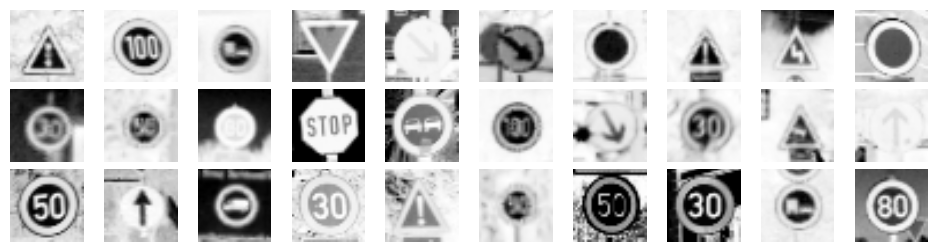

step 0, training accuracy 1
validation accuracy 0.995282


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:24: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


step 200, training accuracy 1
step 400, training accuracy 1
validation accuracy 0.99541
step 600, training accuracy 1
step 800, training accuracy 1
step 1000, training accuracy 1
validation accuracy 0.995282
step 1200, training accuracy 1
step 1400, training accuracy 1
validation accuracy 0.995665
step 1600, training accuracy 1
step 1800, training accuracy 1
step 2000, training accuracy 1
validation accuracy 0.995537
step 2200, training accuracy 1
step 2400, training accuracy 1
validation accuracy 0.995282
step 2600, training accuracy 1
step 2800, training accuracy 1
step 3000, training accuracy 1
validation accuracy 0.995537
step 3200, training accuracy 1
step 3400, training accuracy 1
validation accuracy 0.996175
step 3600, training accuracy 1
step 3800, training accuracy 1
step 4000, training accuracy 1
validation accuracy 0.99541
step 4200, training accuracy 1
step 4400, training accuracy 1
validation accuracy 0.995155
step 4600, training accuracy 1
step 4800, training accuracy 1
s

In [36]:
## Actual training, can run multiple times
import time

X_train_set, X_validation_set, Y_train, Y_validation = \
    get_train_validation_set()
    
print (X_train_set.shape)
print (Y_train.shape)
print (X_validation_set.shape)
print (Y_validation.shape)
show_images(images=X_validation_set)

starttime = time.clock()
do_train(steps=50000,
         batch_size = 200,
         X_train_set = X_train_set,
         Y_train = Y_train,
         X_validation_set = X_validation_set,
         Y_validation = Y_validation)
endtime = time.clock()

print('Training took {:.2f} seconds'.format(endtime - starttime))



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Train the model using:
  * optimizer: AdamOptimizer
  * batch size: 100, 200, 2000
  * epochs: 10,000, 100,000, and 200,000 steps / 31367 inputs
  * hyperparameter:
      * learning rate: 1e-4 (avoid overshotting the bottom)
      * Split training randomly set to 80% training and 20% validation set (avoid overfiting)
      

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

The approach is from reading the class material and its references. There are also some good points from the class forum.

First used the tow layer convolutinal archtect from TenserFlow deep-mnist-for-experts example and got a test accuacy around 0.9 in 24,000 steps.

Then tried split train data for 20% validation data. Got a test accuacy around 0.9 in 10,000 steps

To get a better result, more experient could be done and take the best.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

There might be resolution differences in the candidate images that make classification difficult. There are also color corrections/ white balance /contract that affect the result. The font of the sings should also affect the result. But the biggest problem will be no enough of training images to cover all the conditions in the images. Gittered images might help but they don't represent the real life images.

In [27]:
### Run the predictions here.
### Feel free to use as many code cells as needed.


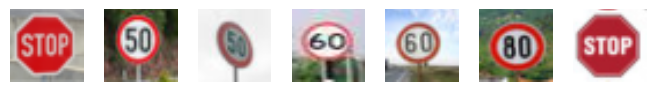

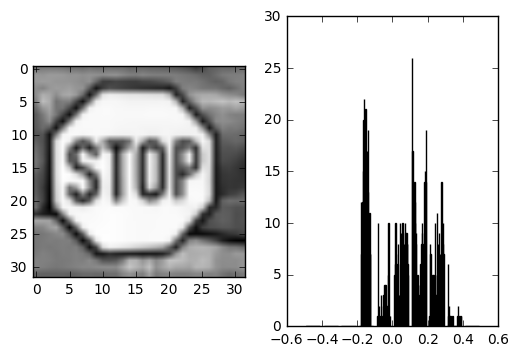

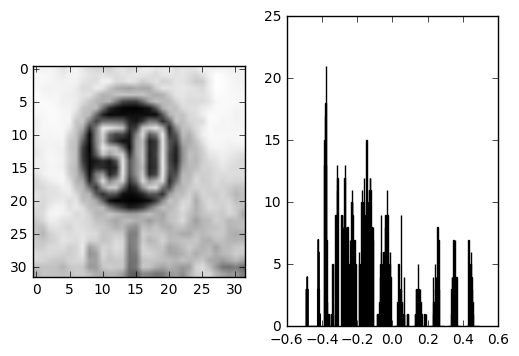

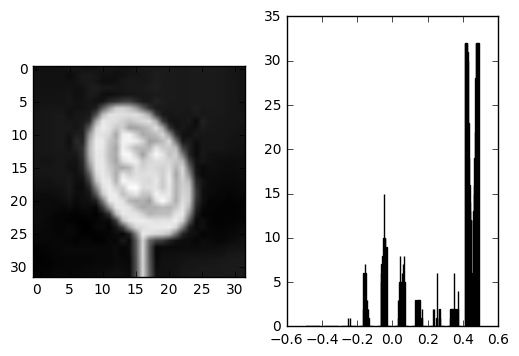

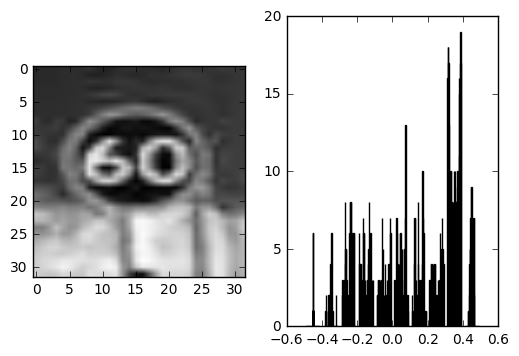

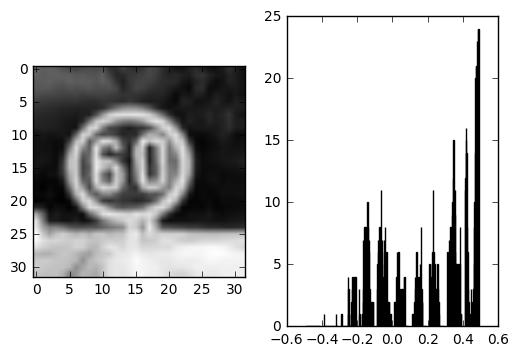

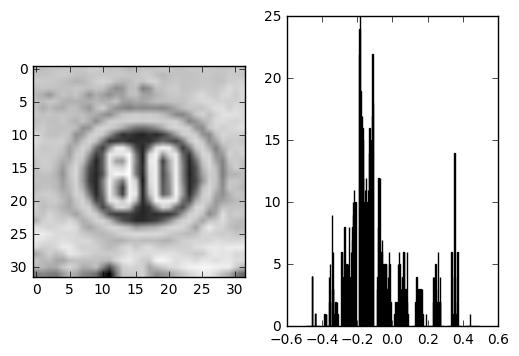

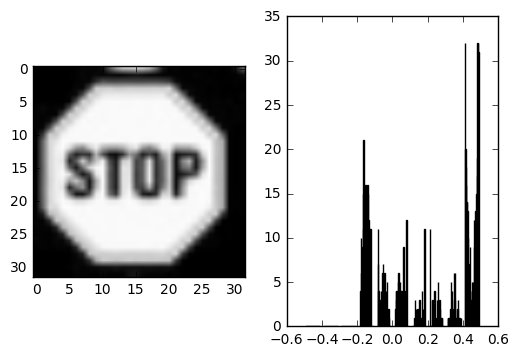

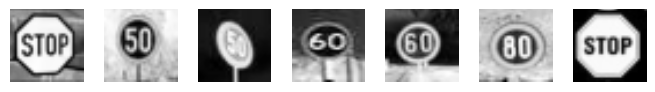

[[ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000]
 [ 0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000]
 [ 0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
   0.000  0.000  0.000]
 [ 0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000

In [48]:
from scipy import misc
import glob

n_new_images = 7
new_images = []

# load new images
for i in range(n_new_images):
    ifile = 'data/tfs-new-{}.png'.format(i)
    im = misc.imread(ifile)[:, :, :3]
    im = misc.imresize(im, (32, 32))
    # print (im.shape)
    new_images.append(im)

#plt.imshow(images[0])
show_images(images=new_images, size=len(new_images), skips=1)
new_test_labels = [14, 2, 2, 3, 3, 5, 14]
X_test_new_set = color_to_grey_images(new_images)

for i in range(n_new_images):
    show_grey_image_hist(X_test_new_set[i])
    
show_images(images=X_test_new_set, size=len(X_test_new_set), skips=1)

Y_test_new = convertToOneHot(new_test_labels)
print (Y_test_new)


In [49]:
## Using the new images
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
pre_layer = y_conv.eval(feed_dict={
        x: X_test_new_set, y_: Y_test_new, keep_prob: 1.0})
pre_sm = tf.nn.softmax(pre_layer).eval()
# print (pre_sm)
lab_sm = y_.eval(feed_dict={
        x: X_test_new_set, y_: Y_test_new, keep_prob: 1.0})
# print ('predictions softmax: ')
# print (pre_sm)
pre = np.argmax(pre_sm, 1)
lab = np.argmax(lab_sm, 1)
# print (np.argmax(Y_test_new, 1))
print (pre)
print (lab)
cor_pre = np.equal(pre, lab)
print ('Predictions: ', cor_pre)
print ('Acuracy: ', np.mean(cor_pre.astype(np.float32)))

# print("test accuracy %g"%accuracy.eval(feed_dict={
#    x: X_test_new_set, y_: Y_test_new, keep_prob: 1.0}))


[14  2  3  9  3  5 14]
[14  2  2  3  3  5 14]
Predictions:  [ True  True False False  True  True  True]
Acuracy:  0.714286


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

The model performs worse on the capture pitures, comparing to the testing on the dataset.

The acurace is only 0.71 compared to testing acruracy 0.94.


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


In [29]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


**Answer:**

In [50]:
# print (pre_sm)
values, indices = tf.nn.top_k(pre_sm, k=5)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print ('Top 5 guess:  \n', values.eval())
print ('Top 5 predict: \n', indices.eval())
print ('Predict: ', pre)
print ('Label  : ', lab)
cor_pre = np.equal(pre, lab)
print ('Predictions: ', cor_pre)


Top 5 guess:  
 [[ 1.000  0.000  0.000  0.000  0.000]
 [ 1.000  0.000  0.000  0.000  0.000]
 [ 0.514  0.485  0.001  0.000  0.000]
 [ 1.000  0.000  0.000  0.000  0.000]
 [ 0.904  0.069  0.027  0.000  0.000]
 [ 1.000  0.000  0.000  0.000  0.000]
 [ 1.000  0.000  0.000  0.000  0.000]]
Top 5 predict: 
 [[14 34  2 33  1]
 [ 2 37 39  1 31]
 [ 3  2 38 13 12]
 [ 9 23 10 37 17]
 [ 3 38  2  5 13]
 [ 5  1  2  3  6]
 [14  4 33  1 17]]
Predict:  [14  2  3  9  3  5 14]
Label  :  [14  2  2  3  3  5 14]
Predictions:  [ True  True False False  True  True  True]


* The preditions are certain: image number 0, 1, 3, 4, 5 and 6.
* The preditions are uncertain: image number 2
* The correct prediction appear in the top k with wrong preditions:
  * Not in the top k: image nmuber 3 
  * In the top k: image number 2
  * The prediction not really appears in top k (only 1/2)
  

In [51]:
si.close()


### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

An interface for newly acquired images should be put in a specified directory. The specified directory could be URI/URL format to be anywhere in the internet. 

The interface will upload the images and go through labeling (could be manual) and pre-processing so that the data can be consume by the training model. The pre-proceesed data will be saved in the pre-defined location for training model to retrieve.

The training model can access the pre-definded location to train the new images. The train model usually be saved in checkpoint files using tf.train.Saver and retrieved for traing the new images.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.